In [3]:
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
import numpy as np

%matplotlib inline

# this notebook is looking at determining if a point falls within an ellipse 
# for use in gmm to establish soft clusters

def classify(points,mean,v,angle):
    Ellipse(mean,v[0],v[1],angle=angle,fill=False)
    
    fig,ax = plt.subplots(1,figsize=(20,10))

    # The ellipse
    g_ell_center = mean
    g_ell_width = v[0]
    g_ell_height = v[1]
    angle = angle

    g_ellipse = Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, color='g', linewidth=2, alpha=1)
    ax.add_artist(g_ellipse)

    cos_angle = np.cos(np.radians(180.-angle))
    sin_angle = np.sin(np.radians(180.-angle))

    xc = x - g_ell_center[0]
    yc = y - g_ell_center[1]

    xct = xc * cos_angle - yc * sin_angle
    yct = xc * sin_angle + yc * cos_angle 

    rad_cc = (xct**2/(g_ell_width/2.)**2) + (yct**2/(g_ell_height/2.)**2)

    colors_array = []

    count = 0

    for r in rad_cc:
        if r <= 1.:
            # point in ellipse
            colors_array.append('green')
            count += 1
        else:
            # point not in ellipse
            colors_array.append('c')
        
    ax.scatter(x,y,c=colors_array,linewidths=0.3)

    print(count)
    plt.xlim(-2,3)
    plt.ylim(-200,300)
    plt.show() 
    
    

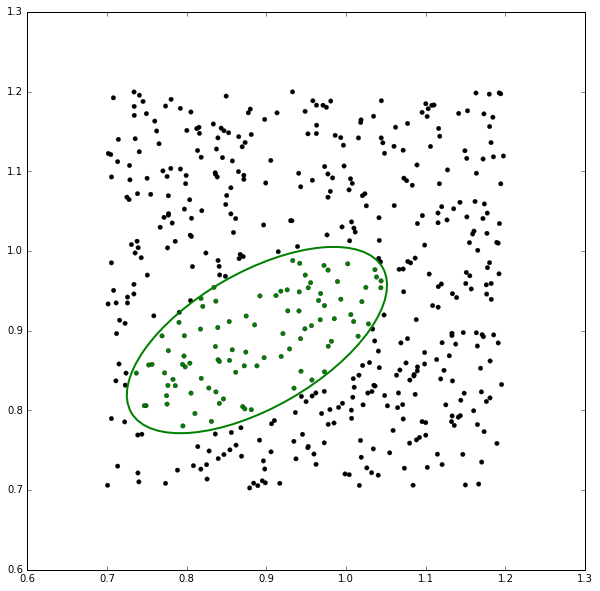

In [8]:
fig,ax = plt.subplots(figsize=(20,10))
ax.set_aspect('equal')

# Some test points
x = np.random.rand(500)*0.5+0.7
y = np.random.rand(500)*0.5+0.7

# The ellipse
g_ell_center = (0.8882, 0.8882)
g_ell_width = 0.36401857095483
g_ell_height = 0.16928136341606
angle = 30.

g_ellipse = patches.Ellipse(g_ell_center, g_ell_width, g_ell_height, angle=angle, fill=False, edgecolor='green', linewidth=2)
ax.add_patch(g_ellipse)

cos_angle = np.cos(np.radians(180.-angle))
sin_angle = np.sin(np.radians(180.-angle))

xc = x - g_ell_center[0]
yc = y - g_ell_center[1]

xct = xc * cos_angle - yc * sin_angle
yct = xc * sin_angle + yc * cos_angle 

rad_cc = (xct**2/(g_ell_width/2.)**2) + (yct**2/(g_ell_height/2.)**2)

colors_array = []

for r in rad_cc:
    if r <= 1.:
        # point in ellipse
        colors_array.append('green')
    else:
        # point not in ellipse
        colors_array.append('black')

ax.scatter(x,y,c=colors_array,linewidths=0.3)

plt.show()